# Projektaufabe Wärmeleitung von Mauro Schegg

**Erstellt am:** 
- 19.11.2024

**Die zwei Simulationsparameter:**
- $r_i = 2.5~cm, r_a  = 4.5~cm$

## 1. Rohr-Isolation:

**Geg.:**
- $r_i = 0.025~\text{m}$ Innenradius

- $r_a  = 0.045~\text{m}$ Aussenradius

- $T(r_i) = T_i = 80~\text{°C}$ Dirichlet innen

- $T_a = 20~\text{°C}$ Konvektion aussen

- $h = 5~\frac{\text{W}}{\text{m}^2 \cdot \text{K}}$ Wärmeübergangskoeffizient

- $k = 0.5~\frac{\text{W}}{\text{m} \cdot \text{K}}$ Wärmeleitfähigkeit

### Aufgabe 1 Handrechnung:

**Geg.:**
- $T(r)  = A~\text{ln}(\frac{r}{r_i}) + B$ 
- $r = [r_i,r_a]$

**Ges.:**
- Lösung $T(r)$

**Rechnung:**
$$T(r_i)  = A*\text{ln}(\frac{r_i}{r_i})+B = 353~\text{K} => B = 353~\text{K}$$
$$T(r_a)  = A*\text{ln}(\frac{r_a}{r_i})+ 353~\text{K}$$

Berechnung der Wärmestromdichten:
$$q_{conv} = -h \cdot (T_a-T(r_a))$$
$$q_{cond} = -k \cdot \frac{\partial{T}}{\partial{r}}$$

Berechnung von A:
$$q_{cond}~|_{r_a} = q_{conv}$$
$$-k \cdot A \cdot \frac{1}{r_a} = -h(T_a-A*\text{ln}(\frac{r_a}{r_i})-353~\text{K})$$
$$A= \frac{-h \cdot 60~\text{K}}{h \cdot \text{ln}(\frac{r_a}{r_i})+\frac{k}{r_a}} = -21.4~\text{K}$$

**Visualisierung:**


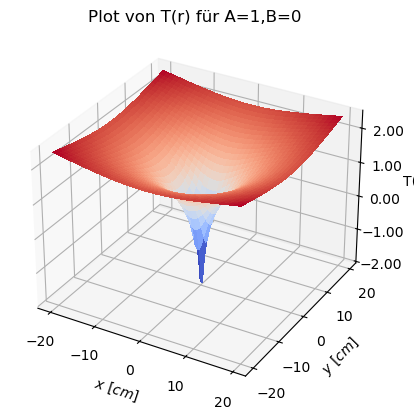

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ri = 2.5  # Innenradius [cm]

# Einstellungen für die Anzeige
X = np.arange(-20, 20, 0.25)
# Ohne null wegen des ln
X = X[X != 0]
Y = np.arange(-20, 20, 0.25)
Y = Y[Y != 0]
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
T = np.log(R / ri)

# Plot der Figur
surf = ax.plot_surface(X, Y, T, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter("{x:.02f}")

ax.set_xlabel("$x~[cm]$")
ax.set_ylabel("$y~[cm]$")
ax.set_zlabel("T(r)")
plt.title("Plot von T(r) für A=1,B=0")
plt.show()

Erkenntnis durch die Visualisierung: 
- Der natürliche Logarithmus würde das Problem für einen Radius gegen 0 unphysikalisch machen, da die Temperatur gegen minus unendlich gehen würde. Der Radius ist jedoch beim Innenradius begrenzt, was zu keinem Problem führt $\text{ln}(1) = 0.$ 

**Lösung:**
- $T(r) = -21.4~\text{K} \cdot \text{ln}(\frac{r}{r_i}) + 353.15~\text{K}$

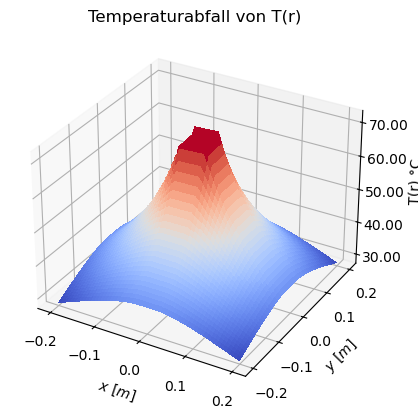

In [2]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ri = 0.025  # Innenradius [m]

# Einstellungen für die Anzeige

x1 = np.arange(0.025, 0.2, 0.001)
x2 = np.arange(-0.20, -0.025, 0.001)

y1 = np.arange(0.025, 0.2, 0.001)
y2 = np.arange(-0.20, -0.025, 0.001)

Y = np.concatenate([y2, y1])
X = np.concatenate([x2, x1])
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
T = -21.4 * np.log(R / ri) + 80

# Plot der Figur
surf = ax.plot_surface(X, Y, T, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter("{x:.02f}")

ax.set_xlabel("$x~[m]$")
ax.set_ylabel("$y~[m]$")
ax.set_zlabel("T(r) °C")
plt.title("Temperaturabfall von T(r)")
plt.show()

Text(0.5, 1.0, 'Temperaturverlauf mit Handrechnung')

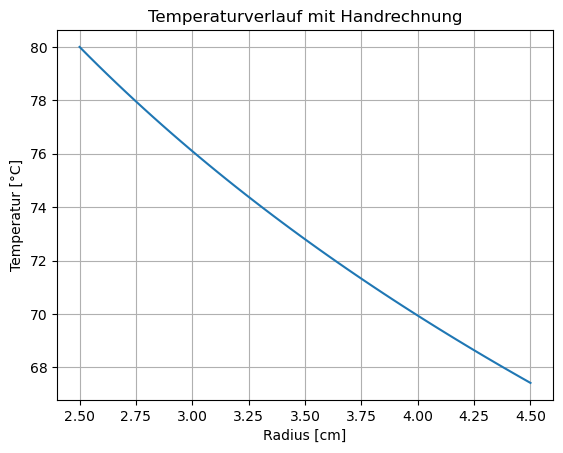

In [3]:
T = lambda r: -21.4 *np.log(r/0.025)+80
r = np.linspace(0.025,0.045)
plt.plot(r*100,T(r))
plt.grid()
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.title("Temperaturverlauf mit Handrechnung")

### Aufgabe 2 Comsol 1D Axialsymmetrisch:

In [4]:
# Einlesen der Daten mit pandas
import pandas as pd
df1 = pd.read_csv("Daten/Daten1D.csv",sep=";")

Text(0.5, 1.0, 'Temperaturverlauf 1D Axialsymmetrisch')

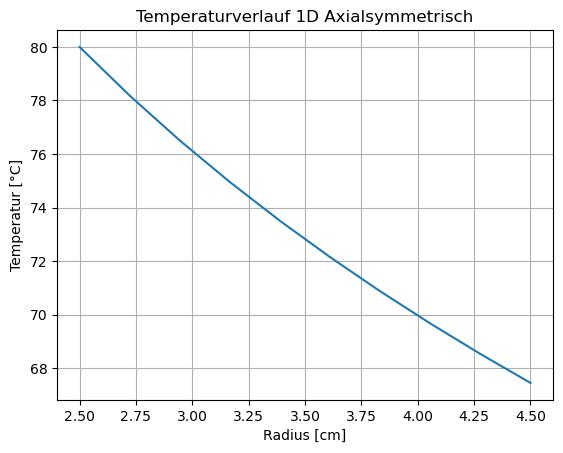

In [5]:
plt.plot(df1["R"]*100,df1["T"])
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.grid()
plt.title("Temperaturverlauf 1D Axialsymmetrisch")

### Aufgabe 3 Comsol 2D:

In [6]:
df2 = pd.read_csv("Daten/Daten2D.csv",sep=";")

Text(0.5, 1.0, 'Temperaturverlauf 2D entlang einem radial Strich')

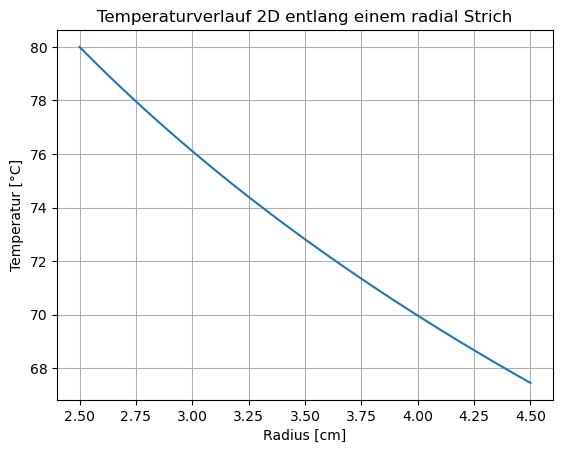

In [7]:
plt.plot(df2["R"]*100,df2["T"])
plt.grid()
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.title("Temperaturverlauf 2D entlang einem radial Strich")

### Aufgabe 4 Vergleich der drei Kurven:

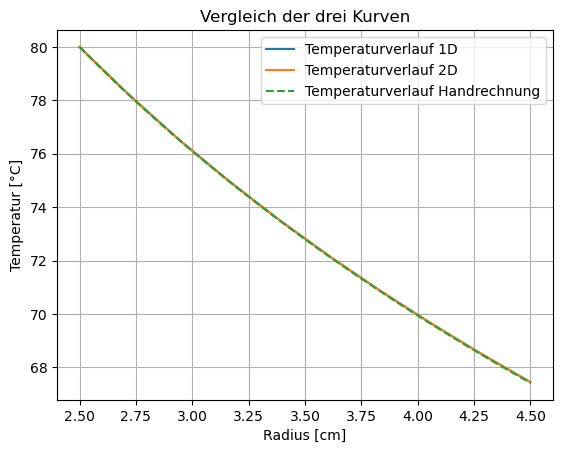

In [8]:
# Plot des Temperaturverlaufs der drei Bestimmungsweg zusammen
plt.plot(df1["R"]*100,df1["T"],label="Temperaturverlauf 1D")
plt.plot(df2["R"]*100,df2["T"],label="Temperaturverlauf 2D")
plt.plot(r*100,T(r),linestyle="--",label="Temperaturverlauf Handrechnung")
plt.grid()
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.title("Vergleich der drei Kurven")
plt.legend()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy.interpolate import interp1d

# Interpolieren von Daten1D auf die x-Werte von Daten2D
interpolator = interp1d(df1["R"], df1["T"], kind='linear', fill_value='extrapolate')
y1_interp = interpolator(df2["R"])
y1_interp = np.array(y1_interp)


In [10]:
# 
x1 = np.linspace(0.025,0.045,len(df1["R"]))
x2 = np.linspace(0.025,0.045,len(df2["R"]))
T1 = T(x1)
T2 = T(x2)

**Bestimmtheitsmass:**

In [11]:
# Vergleich 1D und 2D
r21 = r2_score(y1_interp,df2["T"])
r21

0.9999939333529381

In [12]:
# Vergleich Hand und 1D
r22 = r2_score(T1,df1["T"])
r22

0.9999804581575854

In [13]:
# Vergleich Hand und 2D
r23 = r2_score(T2,df2["T"])
r23

0.997825026940608

- Mann erkennt das die einzelnen Linien nicht voneinander zu unterscheiden sind.
- Das hohe Bestimmtheitsmass sagt aus das die Linien einen sehr ähnlichen verlauf haben.

### Aufgabe 5:

Fouriesches Gesetz:

- $\dot{Q} =  -k \cdot F \cdot \frac{\partial T}{\partial r} $ Wärmefluss $[\frac{W}{m}]$
- $F = 2 \cdot \pi \cdot r \cdot l$

$$\partial T = \frac{\dot{Q}}{k\cdot F}~\partial r$$

$$\int_{T_i}^{T_2} 1 \,dT  = \int_{r_i}^{r_a} \frac{-\dot{Q}}{k 2 r \pi l} \, dr$$

$$\Delta T = - \frac{-\dot{Q}}{2 r \pi k l} (\text{ln}(r_a)-\text{ln}(r_i))$$

$$
\dot{Q} = -\frac{2 \pi k l \Delta T}{\ln\left(\frac{r_a}{r_i}\right)}
$$

**Wärmefluss pro m:** (mit l = 1m dividieren)
$$
q_r = -\frac{2 \pi k \Delta T}{\ln\left(\frac{r_a}{r_i}\right)}
$$

#### Analytisch:

In [14]:
ri = 0.025 # [m] Innendurchmesser
h = 5 # [W/(m^2*K)] Wärmeübertragungskoeffizient
Ti = 353.15 # [K] Randbedingung innen
Ta = 293.15 # [K] Umgebungdtemperatur
k = 0.5 # [W/(m*K)] Wärmeleitfähigkeit

- $A = \frac{-h \cdot 60}{h \cdot \text{ln}(\frac{r_a}{r_i})+\frac{k}{r_a} }$

- $ q =  \frac{-k \cdot A}{r_a}$

- $
q_r = \frac{2 \pi k \Delta T}{\ln\left(\frac{r_a}{r_i}\right)}
$

- $\Delta{T} = A \cdot \text{ln}(\frac{r_a}{r_i}) $


In [15]:
# Funktion für die Berechnung von A für ein ra
A_cal = lambda ra: (-h*60)/(h*np.log(ra/ri)+k/ra) 

# Funktion für die Berechnung der Wärmestromdichte mit ra und A
q_cal = lambda A,ra: -k*A/ra

# Wärmefluss pro Längeneinheit
qr_dot_cal = lambda delT,ra: -2*np.pi*delT*k/(np.log(ra/ri))

# Berechnug der Temperaturdifferenz
delT_cal = lambda A,ra: A*np.log(ra/ri)

# ra von 0.0251 m bis 0.2 m
ra = np.linspace(0.0251,0.2,1000)

# Bestimmung der Werte
A = A_cal(ra)

delT = delT_cal(A,ra)

qr_dot = qr_dot_cal(delT,ra)

q = q_cal(A,ra)

In [16]:
"""
plt.plot(ra*100,q,label="Wärmestromdichte")
plt.ylabel("Wärmestromdichte [W/m^2]")
plt.xlabel("Aussenradius ra [cm] ")
plt.vlines(ymin=52,ymax=330,x=2.5,linestyles="--",colors="red",label="Innenradius ri")
plt.title("Wärmestromdichte abhängig von der Isolationsdicke")
plt.legend()
plt.grid()
"""

'\nplt.plot(ra*100,q,label="Wärmestromdichte")\nplt.ylabel("Wärmestromdichte [W/m^2]")\nplt.xlabel("Aussenradius ra [cm] ")\nplt.vlines(ymin=52,ymax=330,x=2.5,linestyles="--",colors="red",label="Innenradius ri")\nplt.title("Wärmestromdichte abhängig von der Isolationsdicke")\nplt.legend()\nplt.grid()\n'

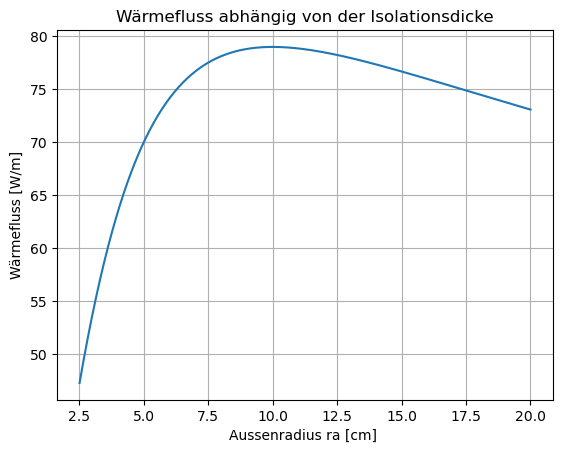

In [17]:
plt.plot(ra*100,qr_dot)
plt.ylabel("Wärmefluss [W/m]")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Wärmefluss abhängig von der Isolationsdicke")
plt.grid()

### Aufgabe 6:

- $L = \frac{Volumen}{Oberfläche} = \frac{r^2 \cdot \pi \cdot l}{2 \cdot r\cdot \pi \cdot l } = \frac{r}{2} ??????????????????????????????????$

- $Bi = \frac{h \cdot L}{k}$
- Gibt bei Wärmetransport durch die Oberfläche das Verhältnis des Wärme(leit)widerstandes des Körpers zum Wärmeübergangswiderstand des umgebenden Mediums an. 
- Bi < 1: Konvektion ist dominant;
- Bi ≈ 1: keine dominante Wärmeübertragung;
- Bi > 1: Wärmeleitung ist dominant.


**Bestimmung der Charakteristischen Länge:**
- 

In [18]:
# ra von 0.0251 m bis 1 m
ra2 = np.linspace(0.0251,1,1000)

# Charakteristische Länge (Maximale Temperaturdifferenz)
L = ra2

# Berechnung der Biot-Zahl 
Bi_cal = lambda L: h*(L)/k
Bi = Bi_cal(L)

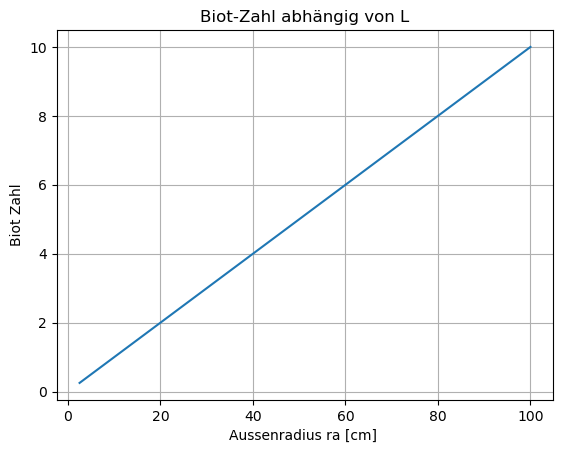

In [19]:
plt.plot(ra2*100,Bi)
plt.ylabel("Biot Zahl")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Biot-Zahl abhängig von L")
plt.grid()

In [20]:
A2 = A_cal(ra2)
delT2 = delT_cal(A2,ra2)

In [21]:
# Wärmefluss pro Längeneinheit mit Biot-Zahl
qr_dot_cal2 = lambda delT,ra: -2*np.pi*delT*k/(np.log(ra/ri))
qr_dot2 = qr_dot_cal2(delT2,ra2)

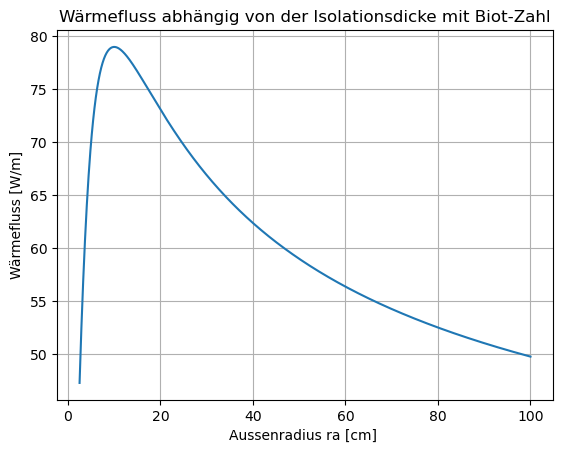

In [22]:
plt.plot(ra2*100,qr_dot2)
plt.ylabel("Wärmefluss [W/m]")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Wärmefluss abhängig von der Isolationsdicke mit Biot-Zahl")
plt.grid()

### Aufgabe 7:

In [23]:
# Bestimmen des Minimums mit Aufgabe 6:
maxQ2 = np.max(qr_dot2)
index = np.argmax(qr_dot2)+25
maxQ2

np.float64(78.99081139674935)

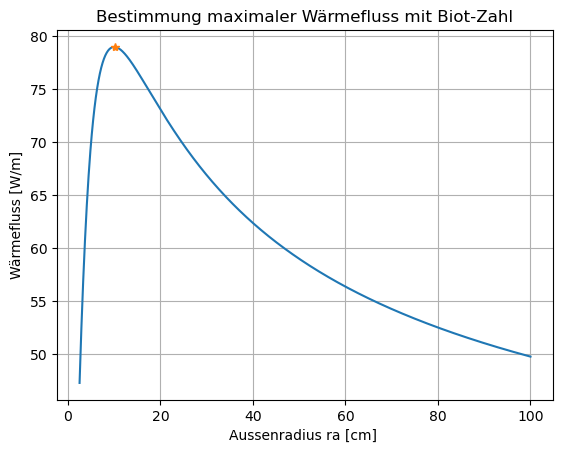

In [ ]:
plt.plot(ra2*100,qr_dot2)
plt.plot(0.1*index,maxQ2,"*")
plt.ylabel("Wärmefluss [W/m]")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Bestimmung maximaler Wärmefluss")
plt.grid()

- Der maximale Wärmefluss mit 79 $[\frac{W}{m}]$  bei $r_a = 10~\text{[cm]}$ 